In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np
from envs import Soccer
from learners import FriendQ

In [2]:
TIME_LIMIT = 1000000

In [3]:
env = Soccer(debug=False)

In [4]:
learner = FriendQ(env)

In [5]:
q_values = []
lr_values = []
for t in range(TIME_LIMIT):
    if t % 100 == 0:
        sys.stdout.write('\r'+str(t))
        q = learner.Qs[0][71, 1, 4]
        q_values.append(q)
        
        lr_values.append(learner.get_lr())
    learner.train()
    

999900

In [6]:
q_values = np.array(q_values)
errs = np.abs(q_values[1:] - q_values[:-1])

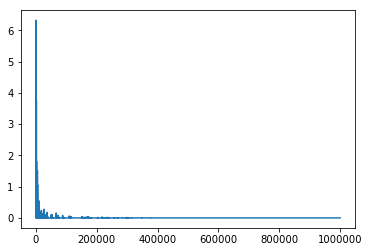

In [7]:
plt.plot(range(100,TIME_LIMIT,100), errs)
plt.show()

In [8]:
errs

array([  2.00615625e+00,   5.87531757e-01,   1.87860577e+00, ...,
         2.93545290e-05,   0.00000000e+00,   2.92962734e-05])

In [9]:
for row in learner.Qs[0][71].tolist():
    print(',\t'.join([str(round(col,2)) for col in row]))
    print

print('\n')

for row in learner.Qs[1][71].tolist():
    print(',\t'.join([str(round(col,2)) for col in row]))
    print

94.66,	91.12,	90.21,	104.56,	94.66
92.93,	90.24,	85.14,	104.65,	92.93
93.09,	90.48,	-11.36,	102.47,	93.09
94.66,	91.86,	92.47,	105.18,	94.66
94.66,	91.12,	90.21,	104.47,	94.66


90.75,	86.3,	93.76,	-94.96,	90.75
85.83,	89.76,	92.14,	-92.88,	85.83
86.22,	85.97,	101.02,	-91.65,	86.22
90.75,	86.3,	92.23,	-95.02,	90.75
90.76,	86.3,	93.76,	-94.88,	90.75


In [13]:
import pandas as pd
df = pd.DataFrame({'t': range(len(errs)),
                   "Err": errs
                  })
df = df[df['Err']>0]
df['t'] = df['t'] * 100
df.head()

,Err,t
0,2.006156,0
1,0.587532,100
2,1.878606,200
5,5.771780,500
6,6.319962,600


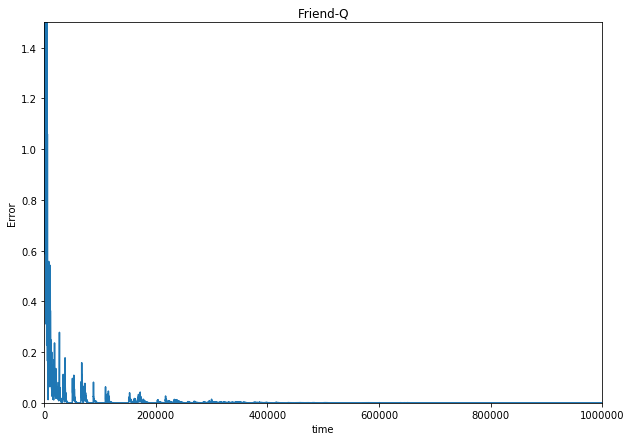

In [14]:
ax = df.plot(x='t', y='Err', figsize=(10, 7), legend=False, ylim=(0., 1.5), title='Friend-Q')
ax.set_xlabel("time")
ax.set_ylabel("Error")
plt.show()